In [121]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np


Read in the dataFile called NetworkAnalysis_DataFile.csv

In [122]:
df = pd.read_csv('NetworkAnalysis_DataFile.csv')

Prepare the data for the analysis

In [123]:
#For the latent class analysis we are only interested in the AESTHEMOS-Values and the corresponding ID
df = df.set_index('id. Response_ID')
mydf=df.copy()
mydf=mydf.iloc[:,1 : 44]
mydf.head()

,Relaxation_1_AESTHEMOS,FeelingOfBeauty_1_AESTHEMOS,Enchantment_1_AESTHEMOS,IntellectualChallenge_2_AESTHEMOS,FeelingOfUgliness_2_AESTHEMOS,BeingMoved_1_AESTHEMOS,Energy_2_AESTHEMOS,Enchantment_2_AESTHEMOS,Relaxation_2_AESTHEMOS,Humor_1_AESTHEMOS,...,Sadness_2_AESTHEMOS,Anger_2_AESTHEMOS,Uneasiness_1_AESTHEMOS,Surprise_2_AESTHEMOS,Awe_2_AESTHEMOS,Boredom_2_AESTHEMOS,FeelingOfUgliness_1_AESTHEMOS,Confusion_2_AESTHEMOS,Joy_2_AESTHEMOS,Energy_1_AESTHEMOS
id. Response_ID,,,,,,,,,,,,,,,,,,,,,
8,4.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,2.0,...,3.0,1.0,1.0,4.0,5.0,1.0,1.0,4.0,5.0,3.0
9,2.0,5.0,3.0,5.0,2.0,5.0,3.0,3.0,1.0,2.0,...,4.0,1.0,2.0,5.0,3.0,1.0,1.0,4.0,3.0,3.0
12,1.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0,1.0,...,1.0,1.0,1.0,2.0,4.0,1.0,1.0,2.0,5.0,3.0
17,4.0,5.0,4.0,4.0,1.0,2.0,4.0,3.0,3.0,5.0,...,1.0,1.0,1.0,5.0,3.0,1.0,1.0,1.0,4.0,5.0
27,5.0,4.0,4.0,4.0,1.0,5.0,2.0,5.0,5.0,3.0,...,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0


In [124]:
#drop all rows that contain non-numeric values like n/a
mydf= mydf.dropna()

Determine k with the help of the ellbow plot

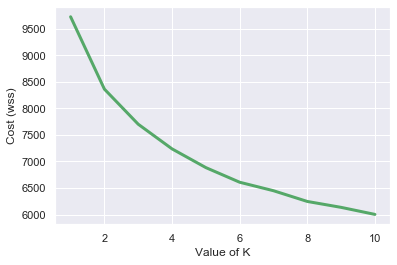

In [126]:
# In order to determine k we let k-means run with different k from 1 to nofClusters (here = 10) and produce the "ellbow"-plot
# For each k we take the best out of 50 runs
cost =[]
nofClusters = 10
for i in range(1, nofClusters+1): 
    KM = KMeans(n_clusters = i, n_init=50) 
    KM.fit(mydf)      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, nofClusters+1), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Cost (wss)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

### The data suggests that we use 2 Clusters

We take the best out of 1000 runs of the k-means algorithm

In [127]:
kmeans = KMeans(n_clusters=2,n_init=1000,max_iter = 1000)
kmeans.fit(mydf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=1000, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [128]:
labels = kmeans.predict(mydf)
mydf['Cluster'] = labels
# You can find the centroids like this:
#centroids = kmeans.cluster_centers_


In [129]:
# produce the csv with the id. Response_ID and the assigned cluster with the name ID_ClusterAssignmentOriginal
myAssignment = mydf['Cluster']
myAssignment.to_csv(r'ID_ClusterAssignmentOriginal.csv', index = True)


In [130]:
myClass0df = mydf.loc[mydf['Cluster'] == 0]
# If you are interested in getting a look at the answers per Clusters: These are the plots of Cluster 0
#myClass0df.plot(subplots=True,figsize=(10,100),sharey=True)

myClass1df = mydf.loc[mydf['Cluster'] == 1]
# If you are interested in getting a look at the answers per Clusters: These are the plots of Cluster 1
#myClass1df.plot(subplots=True,figsize=(10,100),sharey=True)
print(len(myClass0df))
print(len(myClass1df))


52
116


Produce the two csv-files with the mean and std per cluster per Aesthemos with the file names AesthemosAveragebyCluster.csv and AesthemoSTDbyCluster.csv 

In [131]:
byCluster = mydf.groupby(by="Cluster")
avgRating = byCluster.mean();
std = byCluster.std();
avgRating = avgRating.transpose()
std = std.transpose()
avgRating.to_csv(r'AesthemosAveragebyCluster.csv', index = True)
std.to_csv(r'AesthemoSTDbyCluster.csv', index = True)

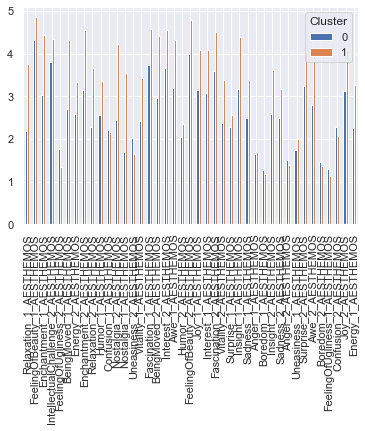

In [132]:
# To get an overview of the Aesthemos average by Clusters
avgRating.plot(kind='bar')

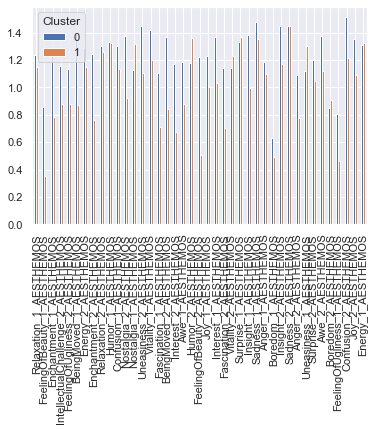

In [133]:
std.plot(kind='bar')

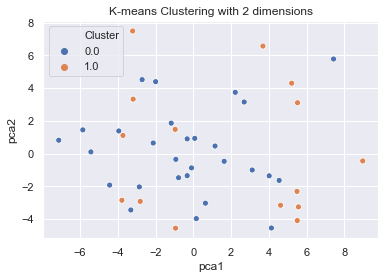

In [120]:
# Principal Component Analysis of the 42-dimensional space 
#reduced_data = PCA(n_components=2).fit_transform(mydf)
#results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
#
#sns.scatterplot(x="pca1", y="pca2", hue=mydf['Cluster'], data=results)
#plt.title('K-means Clustering with 2 dimensions')
#plt.show()
